# Στοχαστικές Διεργασίες και Βελτιστοποίηση στη Μηχανική Μάθηση

## 5ο Εργαστήριο - *Ο αλγόριθμος Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>)*

- Ονομ/νυμο: Χρήστος Νίκου
- AM: 03400146
- Ιδιότητα: Μεταπτυχιακός φοιτητής Επιστήμης Δεδομένων και Μηχανικής Μάθησης (ΕΔΕΜΜ)
- Ηλεκτρονική Διεύθυνση: christosnikou@mail.ntua.gr / chrisnick92@gmail.com

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο της <i>Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>), περισσότερες πληροφορίες για τον οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Simulated_annealing">εδώ</a>. Θα χρησιμοποιήσετε το <b>έτοιμο</b> πρόγραμμα που δίνεται στη συνέχεια. Το πρόγραμμα αυτό επιλύει το πρόβλημα του <i>Περιπλανώμενου Πωλητή</i> (<i>Travelling Salesman Problem</i>, <i>TSP</i>), περισσότερες πληροφορίες για το οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">εδώ</a>. Αρχικά, το πρόβλημα λύνεται χρησιμοποιώντας τον αλγόριθμο <i>Simulated Annealing</i> και, στη συνέχεια, χρησιμοποιώντας τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/Hill_climbing"><i>Hill Climbing</i></a>. Η επίλυση του προβλήματος γίνεται για <b>150 πόλεις</b>.

In [8]:
#!/usr/bin/env python


""" Traveling salesman problem solved using Simulated Annealing.
http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/salesman.py
"""
from scipy import *
from pylab import *
from math import floor

def Distance(R1, R2):
    return sqrt((R1[0] - R2[0]) ** 2 + (R1[1] - R2[1]) ** 2)

def TotalDistance(city, R):
    dist = 0
    for i in range(len(city) - 1):
        dist += Distance(R[city[i]], R[city[i + 1]])
    dist += Distance(R[city[-1]], R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = floor((1 + ((n[1] - n[0]) % nct)) / 2) # half the length of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(nn):
        k = (n[0] + j) % nct
        l = (n[1] - j) % nct
        city[k], city[l] = city[l], city[k]
    
def transpt(city, n):
    nct = len(city)
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range((n[1] - n[0]) % nct + 1):
        newcity.append(city[(j + n[0]) % nct])
    # is followed by segment n[5]...n[2]
    for j in range((n[2] - n[5]) % nct + 1):
        newcity.append(city[(j + n[5]) % nct])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4] - n[3]) % nct + 1):
        newcity.append(city[(j + n[3]) % nct])
    return newcity

def Plot(city, R, dist):
    
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

    ###########################################################################################
    ################################# Simulated Annealing Case ################################
    ###########################################################################################


ncity = 150        # Number of cities to visit
maxTsteps = 100    # Temperature is lowered not more than maxTsteps
Tstart = 0.2       # Starting temperature - has to be high enough
fCool = 0.9        # Factor to multiply temperature at each cooling step
maxSteps = 100 * ncity     # Number of steps at constant temperature
maxAccepted = 10 * ncity   # Number of accepted steps at constant temperature

Preverse = 0.5      # How often to choose reverse/transpose trial move

# Choosing city coordinates
R=[]  # coordinates of cities are choosen randomly
for i in range(ncity):
    R.append([rand(), rand()])
R = array(R)

# The index table -- the order the cities are visited.
city = range(ncity)
city = list(city)
# Distance of the travel at the beginning
dist = TotalDistance(city, R)

# Stores points of a move
n = zeros(6, dtype = int)
nct = len(R) # number of cities

T = Tstart # temperature

def SA(ncity = 150, maxTsteps = 100, Tstart = 0.2, fCool = 0.9, maxSteps = 100*150,
      maxAccepted = 10*150, Preverse = 0.5, R = R, city = city, dist = dist, n = n, nct = nct,
      T = T, show = False):
    distances = []
    distances.append(dist)
    print("Simulated Annealing Case\n")
    print(f"Initial State")
    Plot(city, R, dist)


    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps

            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break

            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0] - 1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1] + 1) % nct  # index after n2   -- see figure in the lecture notes

            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])

                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct

                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])

                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    city = transpt(city, n)

            if accepted > maxAccepted: break
        distances.append(dist)
        
        # Plot
        Plot(city, R, dist)
        print(f"Step={t}, T={T:.5f} , distance= {dist:.5f} , accepted steps={accepted}")

        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop
    return distances

###########################################################################################
############################# Repeating for Hill Climbing Case ############################
###########################################################################################

# The index table -- the order the cities are visited.
city = range(ncity)
city = list(city)
# Distance of the travel at the beginning
dist = TotalDistance(city, R)

# Stores points of a move
n = zeros(6, dtype=int)
nct = len(R) # number of cities

T = Tstart # temperature

def HC(city = city, dist = dist, n = n, nct = nct, T =T, maxTsteps = 100,
      Preverse = 0.5, R = R, maxAccepted = 150*10, show = False):
    distances = []
    distances.append(dist)
    plots = []
    strings = []
    print("Hill Climbing Case\n")
    
    print("Initial state")
    Plot(city, R, dist)

    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps

            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break

            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes

            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])

                if de<0: # Hill Climbing
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct

                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])

                if de<0: # Hill Climbing
                    accepted += 1
                    dist += de
                    city = transpt(city, n)

            if accepted > maxAccepted: break
        distances.append(dist)
        
        # Plot
        Plot(city, R, dist)
        print(f"Step={t}, T={T:.5f} , distance= {dist:.5f} , accepted steps={accepted}")

        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop
        
    return distances

<h3><b><i>Ερωτήσεις</i></b></h3>

<lu>
<li>Να διατυπώσετε το πρόβλημα <i>TSP</i>.</li>
<br>
<li>Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Hill Climbing</i> και να εξηγήσετε γιατί μπορεί να οδηγήσει σε κακές λύσεις.</li>
<br>
<li>Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Simulated Annealing</i> και γιατί είναι δυνατό να οδηγήσει σε καλύτερες λύσεις από τον αλγόριθμο <i>Hill Climbing</i>.</li>
<br>
<li>Να εκτελέσετε τα παραπάνω προγράμματα. Να καταγράψετε τις εξόδους τους. Δεν είναι απαραίτητο να κρατήσετε όλα τα διαγράμματα, αλλά μερικά από τα πιο αντιπροσωπευτικά.</li>
<br>
<li>Να σχολιάσετε τις διαφορές των δύο αλγορίθμων ως προς την τιμή της τελικής λύσης και το συνολικό αριθμό των βημάτων που απαιτούνται για να οδηγηθούμε σε αυτήν. Ποιος αλγόριθμος επιλέγει την καλύτερη λύση; Ποιος αλγόριθμος καθυστερεί πιο πολύ;</li>
<br>
<li>Μελετώντας τα διαγράμματα που επιστρέφουν ως έξοδο τα παραπάνω προγράμματα, να σχολιάσετε πόσο απότομες είναι οι μεταβολές ανάμεσα στις λύσεις που επιστρέφουν οι αλγόριθμοι σε κάθε βήμα μέχρι να φτάσουν στην τελική λύση. Σε ένα δεδομένο βήμα, επιλέγεται πάντα μια καλύτερη λύση ή κάποιος από τους δύο αλγορίθμους επιλέγει και χειρότερες λύσεις;</li>
</lu>

### Απαντήσεις

><b>1. </b> *Να διατυπώσετε το πρόβλημα <i>TSP</i>.*

Το γενικό πρόβλημα *TSP (travelling salesman problem)* πραγματεύεται το εξής πρόβλημα: Δεδομένου μιας λίστας από διάφορες πόλεις και των αποστάσεων (ή κόστος) μεταξύ κάθε ζεύγους πόλεων, ζητείται να βρεθεί ποια είναι η μικρότερη δυνατή διαδρομή η οποία περνάει από κάθε πόλη ακριβώς μια φορά και επιστρέφει στο σημείο εκκίνησης; Από κει και πέρα υπάρχουν διάφορες υποκατηγορίες του παραπάνω γενικού προβλήματος οι οποίες διακρίνονται με βάση τις υποθέσεις του προβλήματος. Για παράδειγμα, μια υποκατηγορία του γενικού προβλήματος *TSP* είναι το συμμετρικό *TSP* πρόβλημα όπου το κόστος μετακίνησης από οποιαδήποτε πόλη $A$ σε μια πολή $B$ είναι το ίδιο με την μετακίνηση από την $B$ στην $A$. Για ένα πρόβλημα *TSP* το μέγεθος των πιθανών λύσεων για $n$ το πλήθος πόλεις είναι της τάξεως του $n!$.

><b>2.</b> *Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Hill Climbing</i> και να εξηγήσετε γιατί μπορεί να οδηγήσει σε κακές λύσεις.*

##### *Μερικές Βασικές Έννοιες*

Πριν περιγράψουμε τον αλγόριθμο *Hill Climbing* να δώσουμε κάποιους απαραίτητους ορισμούς που θα χρησιμοποιήσουμε. Αρχικά, ο αλγόριθμος *Hill Climbing* είναι ένας ευρετικός αλγόριθμος ο οποίος προσπαθεί να βρεί τη βέλτιστη λύση σε κάποιο πρόβλημα βελτιστοποίησης μέσω μιας επαναληπτικής διαδικασίας. Στο γενικότερο πλαίσιο των προβλημάτων βελτιστοποίησης υποθέτουμε πως έχουμε ένα σύνολο καταστάσεων $S$ και ένα υποσύνολο εφικτών λύσεων $F\subseteq S$. Τότε, το πρόβλημα σε ένα πρόβλημα ελαχιστοποίησης (αντ. μεγιστοποίησης) μιας ενδιαφέρει να ελαχιστοποιήσουμε κάποια συνάρτηση κόστους $F$ πάνω απ'το σύνολο $F$. Με άλλα λόγια, μας ενδιαφέρει να βρούμε ένα $x\in F$  για το οποίο να ισχύει $F(x)\leq F(y)$ για κάθε $y\in F$. Για παράδειγμα, στο πρόβλημα του περιπλανώμενου πωλητή $S = F$ είναι όλο το σύνολο των δυνατών μονοπατιών που ξεκινάνε από μια πόλη $A$ και καταλήγουν σε μια πόλη $B$ και $F$ είναι η συνάρτηση που μας δίνει τη συνολική απόσταση της διαδρομής. 

Συνήθως, πάνω στο σύνολο $S$ υπάρχει μια <a href="https://en.wikipedia.org/wiki/Metric_(mathematics)">μετρική</a> $d:S\times S \to \mathbb{R}$ η οποία μας δίνει την απόσταση μεταξύ δύο σημείων του $S$. Για παράδειγμα, στο πρόβλημα του περιπλανώμενου πωλητή έχουμε 

$$d(A,B) = \text{η απόσταση(ή κόστος) μεταξύ των πόλεων } A,B.$$

Ο αλγόριθμος *Hill Climbing* προσπαθεί σε κάθε επανάληψη να βρίσκει καλύτερες λύσεις από μια δεδομένη λύση $x$ για το εκάστοστε πρόβλημα «κοιτάζοντας» για καλύτερες λύσεις σε μια <b>*γειτονιά*</b> του $x$. Πιο συγκεκριμένα, με τον όρο γειτονιά του $x$ ακτινάς $\epsilon>0$ εννοούμε το σύνολο

$$\mathcal{N}(x,\epsilon) = \{y\in S:\, d(x,y)<\epsilon\}.$$

Δηλαδή, όλα τα σημεία $y$ του χώρου καταστάσεων $S$ τα οποία απέχουν το πολύ $\epsilon>0$ απ' το $x$ με βάση τη μετρική απόστασης $d$. Μια πιθανή λύση $x\in F$ είναι ένα <b>*τοπικό ελάχιστο*</b> της γειτονιάς $\mathcal{N}(x,\epsilon)$ εάν ισχύει $F(x)\leq F(y)$ για κάθε $y\in \mathcal{N}(x,\epsilon).$

##### *Ο Αλγόριθμος Hill Climbing*

Ο Αλγόριθμος *Hill Climbing* για ένα πρόβλημα βελτιστοποίησης μπορεί συνοψιστεί στα εξής τρία βήματα:

<b>1. </b> Αρχικά επιλέγεται μια τυχαία λύση του προβλήματος $x$, η οποία αποθηκεύεται στη μεταβλητή `current`.

<b>2. </b> Επαναλαμβάνουμε τα εξής βήματα με βάση κάποιο κριτήριο τερματισμού:

<ul>
    <li><b> A. </b> Υπολογίζουμε όλα τα γειτονικά σημεία του $x$ και διαλέγουμε το καλύτερο σημείο $y$ απ' όλα αυτά (μικρότερη τιμή στη συνάρτηση που θέλουμε να ελαχιστοποίησουμε).</li>
    <li><b>B. </b> Εάν το $y$ μας δίνει καλύτερη λύση απ' το $x$ τότε θέτουμε στη μεταβλητή current το $y$, αλλιώς παραμένει το $x$. </li>  
</ul>

Ένα βασικό μειονέκτημα του αλγορίθμου *Hill Climbing* είναι ότι πολύ συχνά στην πράξη <b>*παγιδεύεται σε κάποιο τοπικό ακρότατο*</b> με αποτέλεσμα να μην μπορεί να βρει την βέλτιστη λύση. Αυτό το γεγονός, στις περιπτώσεις που τα τοπικά ακρότατα απέχουν πολύ απ' το ολικό ακρότατο της συνάρτησης οδηγεί σε αρκετά κακές λύσεις. Μερικές βασικές ιδιότητες του αλγορίθμου *Hill Climbing* είναι οι εξής:

<ul>
    <li> Όπως αναφέραμε και προηγουμένως, η τελική λύση μπορεί να αντιστοιχεί σε κάποιο τοπικό ακρότατο της συνάρτησης το οποία να απέχει πολύ απ' το ολικό ακρότατο.</li>
    <li> Ο Αλγόριθμος αντιμετωπίζει πρόβλημα σε προβλήματα όπου η συνάρτηση προς ελαχιστοποίηση (ή μεγιστοποίηση) είναι σταθερή σε κάποια περιοχή. Σε αυτή την περίπτωση ο αλγόριθμος δε μπορεί να επίλεξει κάποιο γειτονικό σημείο και έτσι τερματίζει.</li>
    <li> Δεν μας περέχει καμία πληροφορία για το πόσο απέχει το τοπικό ακρότατο που μπορεί να εντοπίσει απ' το ολικό ακρότατο.</li>
    <li> Η λύση που μας παρέχει εξαρτάται σε μεγάλο βαθμό από το σημείο εκκίνησης του αλγορίθμου.</li>
    <li> Είναι αδυνατό να βρεθεί κάποιο άνω φράγμα για τον χρόνο εκτέλεσης του αλγορίθμου.</li>
    
Στη συγκεκριμένη υλοποίηση του αλγορίθμου *Hill Climbing* για το πρόβλημα *TSP* ο αλγόριθμος επαναλαμβάνεται όσες φορές υποδεικνύει η μεταβλητή `maxTsteps`, η οποία λαμβάνει την τιμή $100$. Εν συνεχεία ο αλγόριθμος ξεκινάει με μια αρχική λύση για το πρόβλημα και επιλέγει στην τύχη δύο γειτονικές πόλεις των οποίων αλλάζει τη σειρά επίσκεψης στην αρχική λύση. Εάν η λύση που προκύπτει αντιστοιχεί σε μικρότερη απόσταση τότε η αρχική λύση αντικαθίσταται, σε αντίθετη περίπτωση παραμένει.

><b>3.</b> *Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου Simulated Annealing και γιατί είναι δυνατό να οδηγήσει σε καλύτερες λύσεις από τον αλγόριθμο Hill Climbing.*

Η βασική διαφορά του αλγορίθμου *Simulated Annealing* σε σχέση με τον αλγόριθμο *Hill Climbing* είναι ότι αφήνει κάποιο όριο ανοχής στις επιλογές γειτονικών λύσεων που οδηγούν προσωρινά σε κάποια χειρότερη λύση από αυτήν που ήδη υπάρχει. Ο σκοπός αυτής της ανοχής είναι στο να μειώσει την πιθανότητα του να παγιδευτεί ο αλγόριθμος σε κάποιο τοπικό ελάχιστο. Πιο αναλυτικά, στη συγκεκριμένη υλοποίηση η μετάβαση από μια λύση $x$ σε μια λύση $y$ γίνεται εάν ικανοποιείται μια απ' τις δύο παρακάτω συνθήκες:

<ul>
    <li> Είτε εάν η $y$ οδηγεί σε καλύτερη λύση από την $x$ είτε </li>
    <li> εάν $\exp\biggl(-\frac{F(y)-F(x)}{T_k}\biggr)> p$, όπου $p$ είναι ένας τυχαία επιλεγμένος αριθμός στο $(0,1)$ ,$T_k$ είναι η θερμοκρασία του συστήματος κατά την $k-$οστή επανάληψη.
</ul>

Στη συγκεκριμένη υλοποίηση αρχικά η θερμοκρασία του συστήματος $T$ αρχικοποιείται με την τιμή $T = 0.2$. Ύστερα, εκτελούνται $100$ (μεταβλητή `maxTsteps`) επαναλήψεις όπου σε κάθε επανάληψη η θερμοκρασία του συστήματος κατά τον παράγοντα που ορίζει η μεταβλητή `fcool=0.9`. Για σταθερή θερμοκρασία εκτελούνται $150.000$ επαναλήψεις (μεταβλητή `maxSteps`) ή μέχρις ότου γίνουν $1.500$ αλλαγές κατάστασης. Τώρα, για να ερμηνεύσουμε τον ρόλο της παραμέτρου $T$ γράφουμε

\begin{align}
\exp\biggl(-\frac{F(y)-F(x)}{T}\biggr) > p \Longleftrightarrow F(y) < F(x) -T\log p,
\end{align}

όπου υπενθυμίζουμε ότι με $F(y)$ συμβολίζουμε τη συνολική απόσταση της λύσης $y$, με $F(x)$ της λύσης $x$ και με $p$ έναν τυχαίο αριθμό επιλεγμένο στο $(0,1)$. Τώρα, είναι εύκολο να ερμηνεύσουμε την υπερπαράμετρο της θερμοκρασίας $T$. Αρχικά, ξεκινώντας με μεγάλη τιμή για την παράμετρο $T$ και χρησιμοποιώντας το γεγονός ότι $T\log p <0$ βλέπουμε ότι αποδεχόμαστε είτε καλύτερες λύσεις από την $x$ είτε και λύσει μεταξύ του διαστήματος $(F(x), F(x)-T\log p)$, δηλαδή λύσεις με απόσταση περισσότερη το πολύ $-T\log p$. Όσο οι επαναλήψεις αυξάνονται, η θερμοκρασία του συστήματος μειώνεται και έτσι μικραίνει και η ποσότητα $-T\log p$, έχοντας ως αποτελέσμα να επιλέγουμε μόνο λύσει οι οποίες είναι είτε καλύτερες είτε ελάχιστα χειρότερες από την εκάστοτε λύση. Αυτή η τεχνική βοηθάει τον αλγόριθμο στο να αποφεύγει πιο εύκολα τα τοπικά ελάχιστο ευελπιστώντας ότι θα καταλήξει κάποια στιγμή στο ολικό ελάχιστο ή τουλάχιστον σε κάποιο καλύτερο τοπικό ελάχιστο απ' ότι ο *Hill Climbing.* Αυτός είναι και ο λόγος για τον οποίο η μέθοδος του <b>*Simulated Annealing* οδηγεί συνήθως σε καλύτερα αποτελέσματα από τον *Hill Climbing*.</b> Μερικές βασικές ιδιότητες του *Simulated Annealing* είναι οι εξής:

<ul>
    <li> Σε αντίθεση με τον αλγόριθμο Hill Climbing ο Simulated Annealing δέχεται και χειρότερες λύσεις έτσι ώστε να αποφύγει όσο τον δυνατόν περισσότερα τοπικά ελάχιστα.</li>
    <li> Αρχικά, σε τιμές υψηλής θερμοκρασίας γίνονται αποδεκτές αρκετά χειρότερες λύσεις.</li>
    <li> Όσο η θερμοκρασία του συστήματος μειώνεται, μόνο ελάχιστα χειρότερες λύσεις γίνονται αποδεκτές.</li>
    <li> Όταν η θερμοκρασία τείνει στο $0$, τότε ο αλγόριθμος Simulated Annealing συμπεριφέρεται όπως ο Hill Climbing. Δηλαδή, γίνονται αποδεκτές μόνο καλύτερες λύσεις.</li>
</ul>

><b>4. </b> *Να εκτελέσετε τα παραπάνω προγράμματα. Να καταγράψετε τις εξόδους τους. Δεν είναι απαραίτητο να κρατήσετε όλα τα διαγράμματα, αλλά μερικά από τα πιο αντιπροσωπευτικά.*

Παρακάτω κατασκευάζουμε μια συνάρτηση για να χρονομετράμε τον χρόνο εκτέλεσης της κάθε μεθόδου.

In [2]:
import time 

def timer(tic):
    toc = time.time()-tic
    return f"{toc//60} Min(s) {toc % 60:.4f} sec(s)"

Πρώτα εκτελούμε τον αλγόριθμο *Hill Climbing* κρατώντας μόνο το αρχικό και το τελευταίο διάγραμμα της διαδρομής που επιλέγει ο πωλητής.

Hill Climbing Case

Initial state


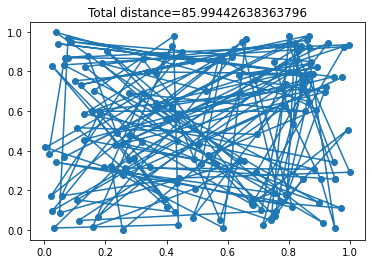

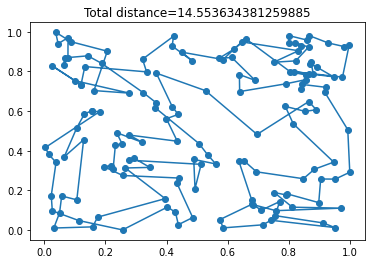

Step=0, T=0.20000 , distance= 14.55363 , accepted steps=424


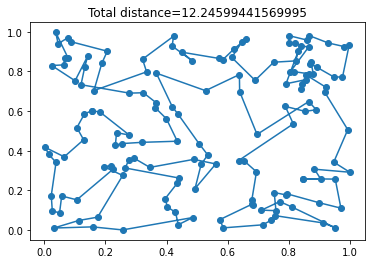

Step=1, T=0.18000 , distance= 12.24599 , accepted steps=55


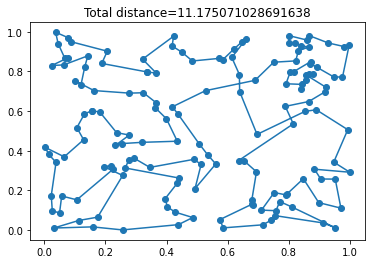

Step=2, T=0.16200 , distance= 11.17507 , accepted steps=24


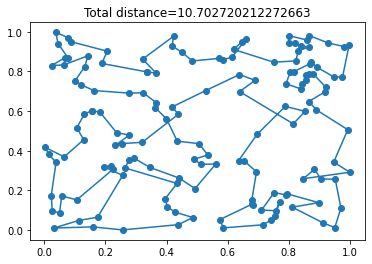

Step=3, T=0.14580 , distance= 10.70272 , accepted steps=21


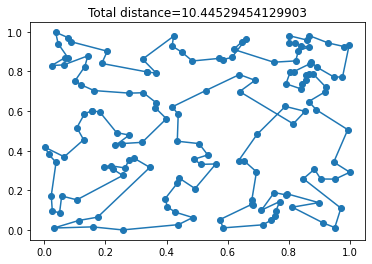

Step=4, T=0.13122 , distance= 10.44529 , accepted steps=8


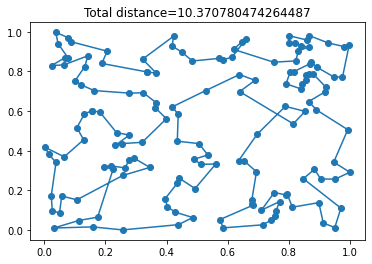

Step=5, T=0.11810 , distance= 10.37078 , accepted steps=3


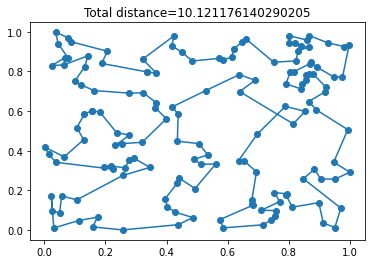

Step=6, T=0.10629 , distance= 10.12118 , accepted steps=5


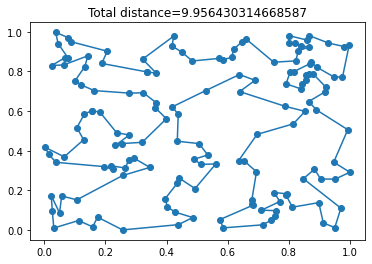

Step=7, T=0.09566 , distance= 9.95643 , accepted steps=4


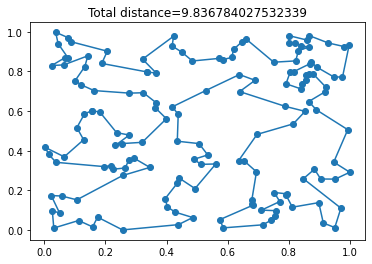

Step=8, T=0.08609 , distance= 9.83678 , accepted steps=2


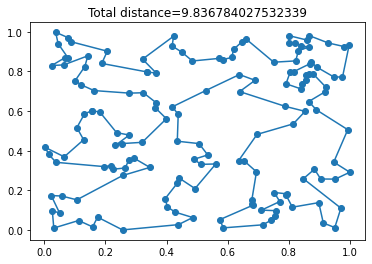

Step=9, T=0.07748 , distance= 9.83678 , accepted steps=0
-----> Hill Climbing Info <-----

- Time elapsed: 0.0 Min(s) 4.8328 sec(s)
- Distance of initial solution: 85.99442638363796
- Distance of ending solution: 9.836784027532339
- Difference: 76.15764235610561


In [9]:
tic = time.time()
dists = HC()

print(f"{5*'-'}> Hill Climbing Info <{5*'-'}\n")
print(f"- Time elapsed: {timer(tic)}")
print(f"- Distance of initial solution: {dists[0]}")
print(f"- Distance of ending solution: {dists[-1]}")
print(f"- Difference: {dists[0]-dists[-1]}")

Όπως βλέπουμε ο αλγόριθμος *Hill Climbing* διέρκησε 4.8328 δευτερόλεπτα. Η αρχική λύση είχε συνολική απόσταση διαδρομής ίση με 85.99 μονάδες ενώ η τελική λύση ίση με 9.83. Παρακάτω βλέπουμε και τα αντίστοιχα αποτελέσματα του *Simulated Annealing*.

Simulated Annealing Case

Initial State


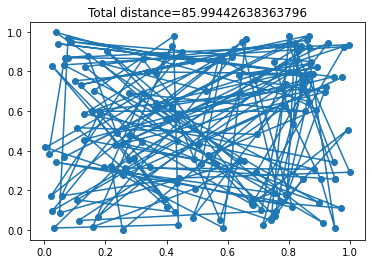

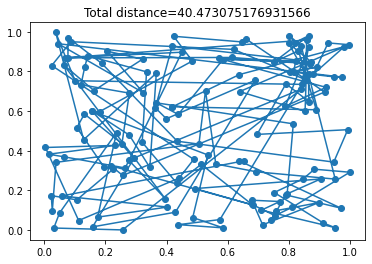

Step=0, T=0.20000 , distance= 40.47308 , accepted steps=1501


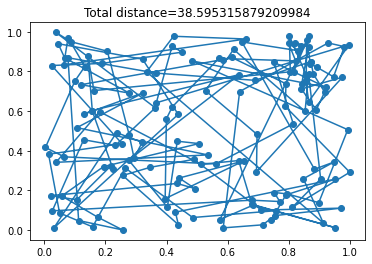

Step=1, T=0.18000 , distance= 38.59532 , accepted steps=1501


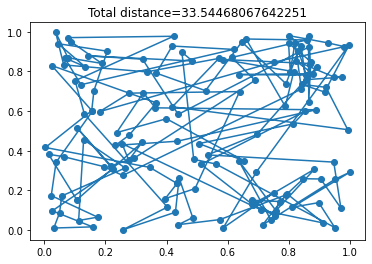

Step=2, T=0.16200 , distance= 33.54468 , accepted steps=1501


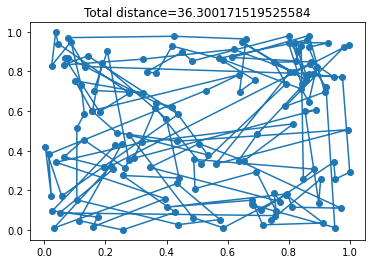

Step=3, T=0.14580 , distance= 36.30017 , accepted steps=1501


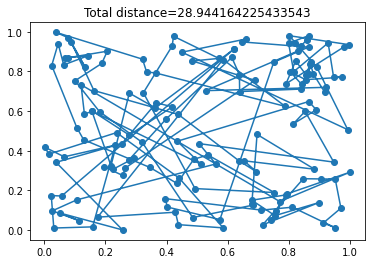

Step=4, T=0.13122 , distance= 28.94416 , accepted steps=1501


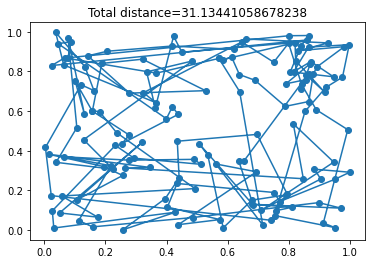

Step=5, T=0.11810 , distance= 31.13441 , accepted steps=1424


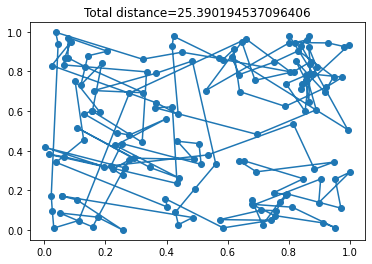

Step=6, T=0.10629 , distance= 25.39019 , accepted steps=1201


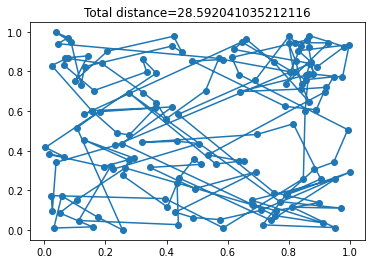

Step=7, T=0.09566 , distance= 28.59204 , accepted steps=1060


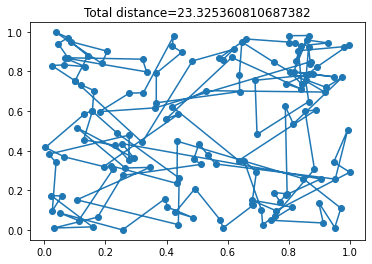

Step=8, T=0.08609 , distance= 23.32536 , accepted steps=949


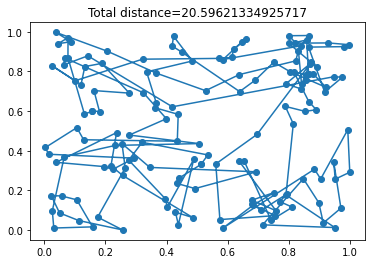

Step=9, T=0.07748 , distance= 20.59621 , accepted steps=650


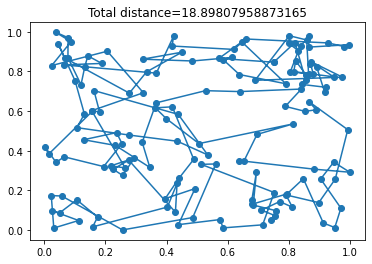

Step=10, T=0.06974 , distance= 18.89808 , accepted steps=630


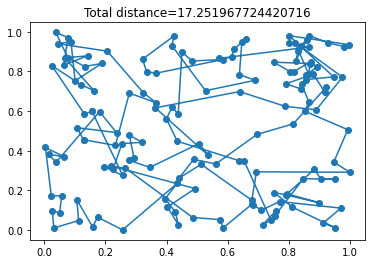

Step=11, T=0.06276 , distance= 17.25197 , accepted steps=474


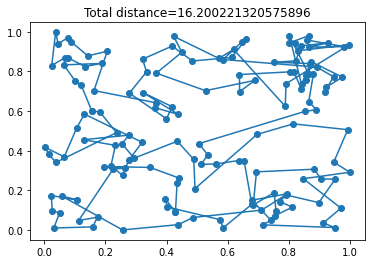

Step=12, T=0.05649 , distance= 16.20022 , accepted steps=361


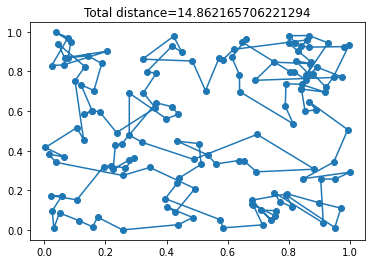

Step=13, T=0.05084 , distance= 14.86217 , accepted steps=341


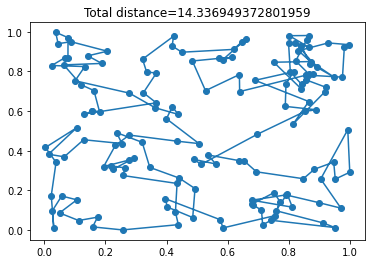

Step=14, T=0.04575 , distance= 14.33695 , accepted steps=295


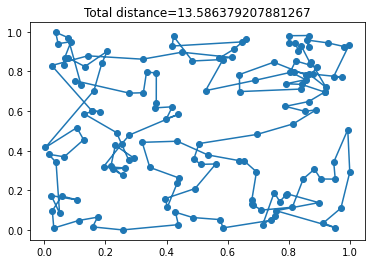

Step=15, T=0.04118 , distance= 13.58638 , accepted steps=224


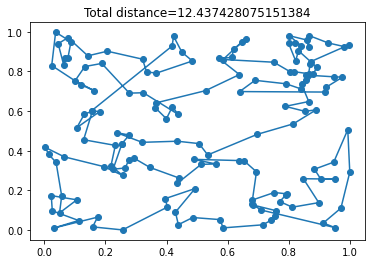

Step=16, T=0.03706 , distance= 12.43743 , accepted steps=171


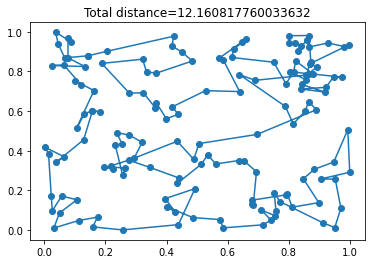

Step=17, T=0.03335 , distance= 12.16082 , accepted steps=143


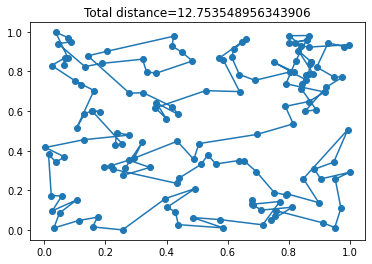

Step=18, T=0.03002 , distance= 12.75355 , accepted steps=143


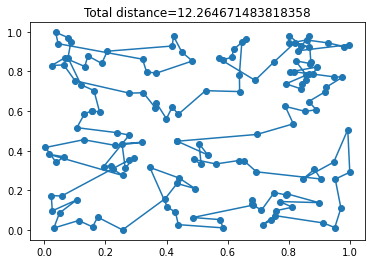

Step=19, T=0.02702 , distance= 12.26467 , accepted steps=158


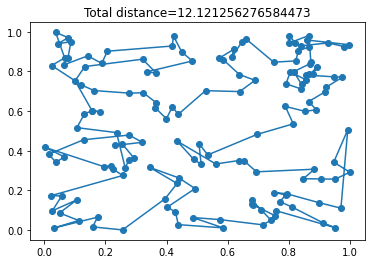

Step=20, T=0.02432 , distance= 12.12126 , accepted steps=127


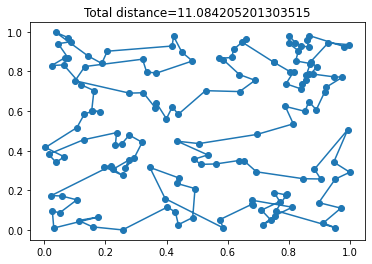

Step=21, T=0.02188 , distance= 11.08421 , accepted steps=114


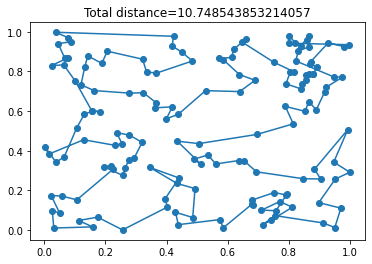

Step=22, T=0.01970 , distance= 10.74854 , accepted steps=67


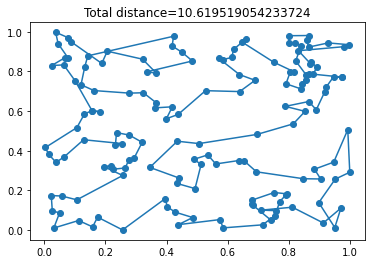

Step=23, T=0.01773 , distance= 10.61952 , accepted steps=53


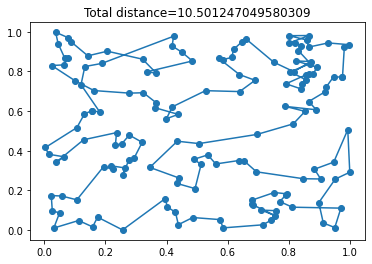

Step=24, T=0.01595 , distance= 10.50125 , accepted steps=52


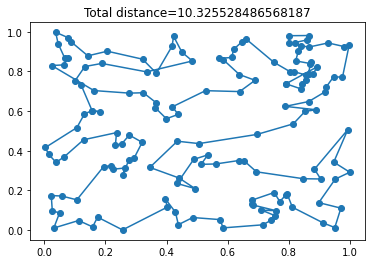

Step=25, T=0.01436 , distance= 10.32553 , accepted steps=47


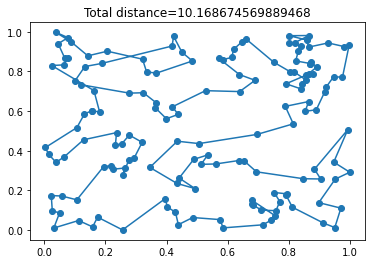

Step=26, T=0.01292 , distance= 10.16867 , accepted steps=35


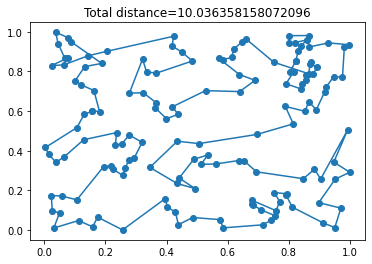

Step=27, T=0.01163 , distance= 10.03636 , accepted steps=30


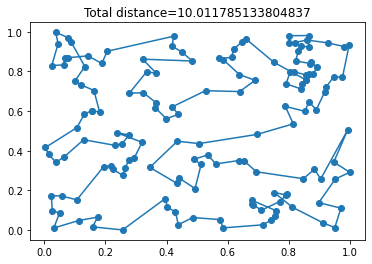

Step=28, T=0.01047 , distance= 10.01179 , accepted steps=38


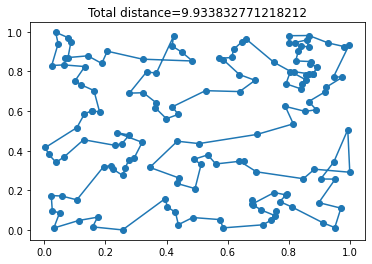

Step=29, T=0.00942 , distance= 9.93383 , accepted steps=24


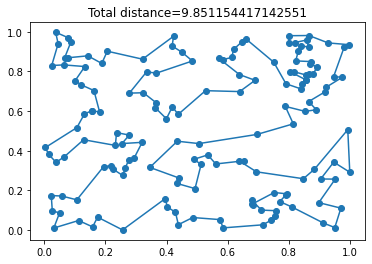

Step=30, T=0.00848 , distance= 9.85115 , accepted steps=25


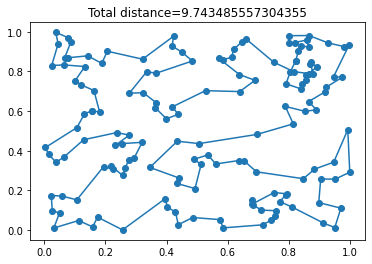

Step=31, T=0.00763 , distance= 9.74349 , accepted steps=20


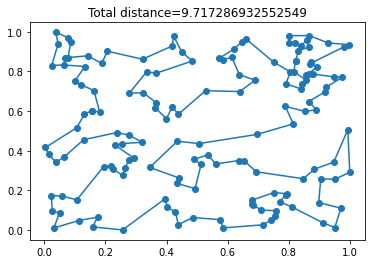

Step=32, T=0.00687 , distance= 9.71729 , accepted steps=14


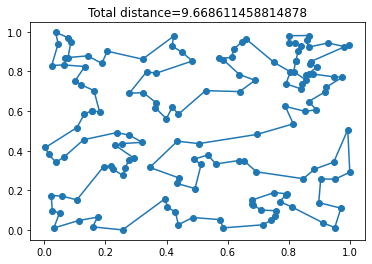

Step=33, T=0.00618 , distance= 9.66861 , accepted steps=7


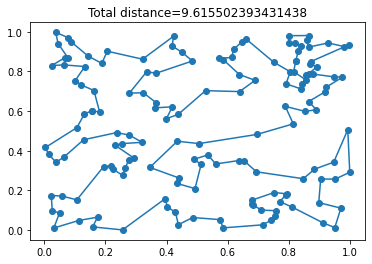

Step=34, T=0.00556 , distance= 9.61550 , accepted steps=5


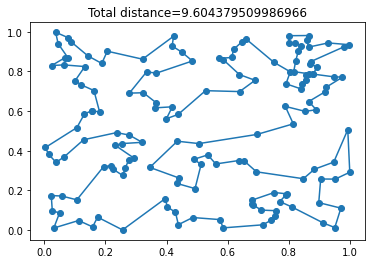

Step=35, T=0.00501 , distance= 9.60438 , accepted steps=7


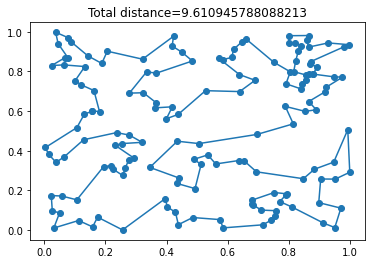

Step=36, T=0.00451 , distance= 9.61095 , accepted steps=5


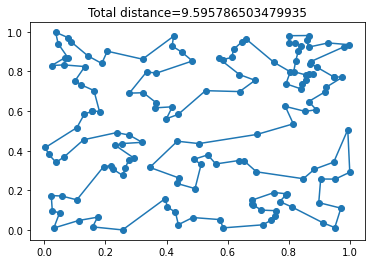

Step=37, T=0.00406 , distance= 9.59579 , accepted steps=7


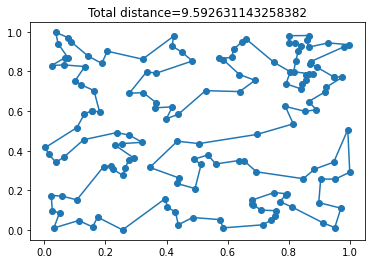

Step=38, T=0.00365 , distance= 9.59263 , accepted steps=7


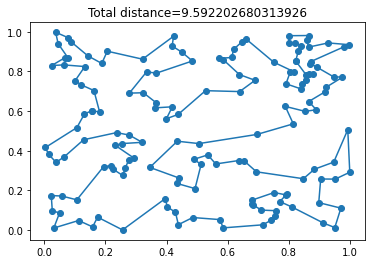

Step=39, T=0.00328 , distance= 9.59220 , accepted steps=3


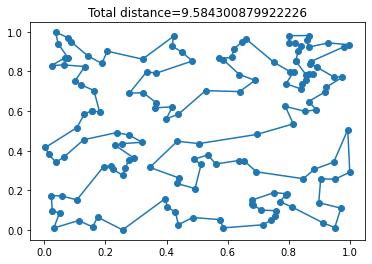

Step=40, T=0.00296 , distance= 9.58430 , accepted steps=2


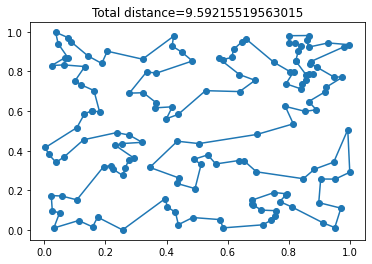

Step=41, T=0.00266 , distance= 9.59216 , accepted steps=4


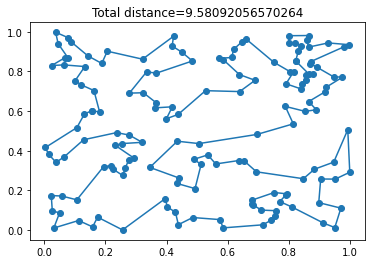

Step=42, T=0.00239 , distance= 9.58092 , accepted steps=5


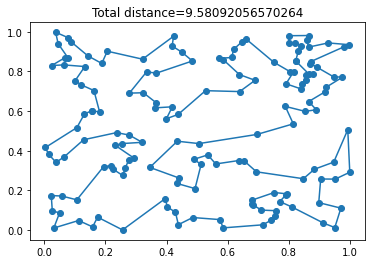

Step=43, T=0.00216 , distance= 9.58092 , accepted steps=2


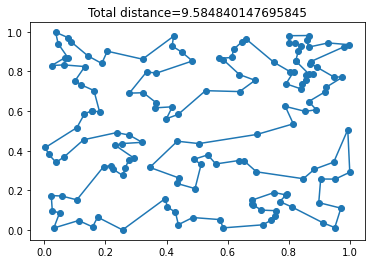

Step=44, T=0.00194 , distance= 9.58484 , accepted steps=1


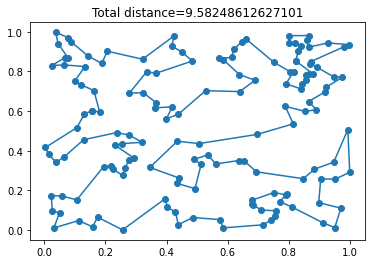

Step=45, T=0.00175 , distance= 9.58249 , accepted steps=1


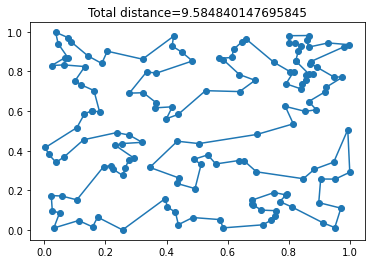

Step=46, T=0.00157 , distance= 9.58484 , accepted steps=3


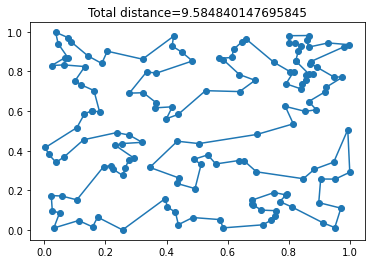

Step=47, T=0.00141 , distance= 9.58484 , accepted steps=0
-----> Simulated Annealing Info <-----

- Time elapsed: 0.0 Min(s) 24.0319 sec(s)
- Distance of initial solution: 85.99442638363796
- Distance of ending solution: 9.584840147695845
- Difference: 76.40958623594211


In [10]:
tic = time.time()
dists = SA()

print(f"{5*'-'}> Simulated Annealing Info <{5*'-'}\n")
print(f"- Time elapsed: {timer(tic)}")
print(f"- Distance of initial solution: {dists[0]}")
print(f"- Distance of ending solution: {dists[-1]}")
print(f"- Difference: {dists[0]-dists[-1]}")

Όπως βλέπουμε ο αλγόριθμος *Simulated Annealing* διέρκησε 24 δευτερόλεπτα δίνοντας τελική λύση η οποία έχει συνολική απόσταση 9.58 μονάδες. Αυτό που παρατηρούμε είναι ότι εν γένει ο αλγόριθμος *Simulated Annealing* διαρκεί περισσότερη ώρα από τον *Hill Climbing* αλλά δίνει καλύτερες λύσεις. Βέβαια, το πόσο καλύτερη θα είναι η λύση δεν μπορούμε να το γνωρίζουμε εκ των προτέρων εξαιτίας της πιθανοθεωρητικής φύσης του αλγορίθμου.

> <b>5. </b>*Μελετώντας τα διαγράμματα που επιστρέφουν ως έξοδο τα παραπάνω προγράμματα, να σχολιάσετε πόσο απότομες είναι οι μεταβολές ανάμεσα στις λύσεις που επιστρέφουν οι αλγόριθμοι σε κάθε βήμα μέχρι να φτάσουν στην τελική λύση. Σε ένα δεδομένο βήμα, επιλέγεται πάντα μια καλύτερη λύση ή κάποιος από τους δύο αλγορίθμους επιλέγει και χειρότερες λύσεις;*

Με βάση τα παραπάνω διαγράμματα αλλά και απ' την περιγραφή των δύο αλγορίθμων αναμένουμε να εντοπίσουμε μεγαλύτερες μεταβολές στις λύσεις που επιστρέφει σε κάθε βήμα στον αλγόριθμο *Hill Climbing*. Αυτό είναι λογικό αφού ο αλγόριθμος *Hill Climbing* επιλέγει πάντα να μετακινηθεί στην καλύτερη γειτονική λύση που υπάρχει δεδομένου μιας λύσης αγνοώντας τις υπόλοιπες λύσεις. Αυτό έχει ως αποτέλεσμα η συνάρτηση κόστους να είναι φθίνουσα ως προς τα βήματα που εκτελεί ο αλγόριθμος *Hill Climbing*. Σε αντίθεση, ο αλγόριθμος *Simulated Annealing* αφήνοντας κάποια ανοχή στις χειρότερες λύσεις οδηγεί σε μικρότερες μεταβολές της συνάρτησης κόστους σε κάθε βήμα. Επίσης, σε μερικές περιπτώσεις μετά το πέρας μιας επανάληψης μπορεί η συνάρτηση κόστους να έχει αυξηθεί από το προηγούμενο βήμα. Αυτό το φαινόμενο μπορούμε να το παρατηρήσουμε και στην παραπάνω προσομοίωση του αλγορίθμου *Simulated Annealing*. Όπως βλέπουμε, μετά το πέρας του βήματος $2$ η συνολική διαδρομή της λύσης αντιστοιχεί σε απόσταση $33.54$ μονάδων ενώ μετά το πέρας του βήματος $3$ η λύση που δίνει η μέθοδος αντιστοιχεί σε απόσταση $36.3$ μονάδων.